# Age Estimation 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# keep it as the first code cell
import numpy as np
import os
from prepare_data_sgd import *

In [ ]:
# %cd '/content/drive/MyDrive/581/project7/'

/content/drive/MyDrive/581/project7


In [ ]:
epoch = 1000
epoch_sgd = 1000
batch_size = 16
momentum = True
img_d = ''
img_n = []
img_size = 224

# Loading Data

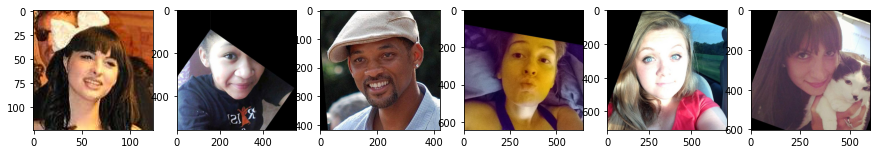

In [ ]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
    Y = age
    
    # Define parameter weights
    
    ##########################################################################
    # TODO: YOUR CODE HERE
    ########################################################################## 
    # calculate the closed form solution
    weights = np.linalg.inv(H.T @ H) @ (H.T @ Y)
    

    # separate the weights and bias
    bias    = weights[0]
    weights    = weights[1:]
    
    return weights, bias

# Validate

Your validate loss is: 67.84


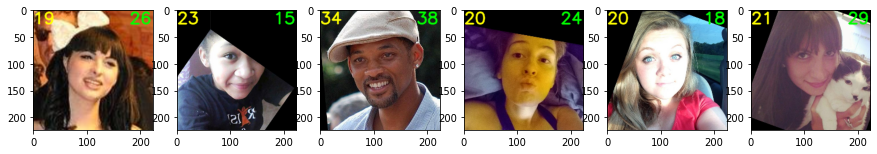

In [ ]:
# my run
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [ ]:
# my run
prediction = test(w, b, features_test, 'cfs.txt')
# print("Test results has saved to cfs.txt")
# print(prediction[:10])

Test results has saved to cfs.txt
[[28.04639961]
 [60.90374506]
 [55.19594922]
 [23.35683532]
 [35.20122166]
 [34.36335498]
 [36.63257244]
 [44.11504375]
 [18.49147786]
 [57.60077158]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)
    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3
    w = weights.copy()
    b = bias.copy()
    # w, b = closed_form_solution(age, feature)
    # w = w.reshape((-1, 1))
    N = len(age)
    X = feature.copy()
    y = age.copy()
    y = y.reshape((-1, 1))

    # print("shapes:")
    # print(f"weights.shape: {w.shape}\n X.shape: {X.shape}\n Y.shape: {y.shape}")

    for e in range(epoch):
        ##########################################################################
        # TODO: YOUR CODE HERE
        ########################################################################## 
        
        # forward pass
        y_pred = X @ w + b

        # calculate loss
        loss = np.sum((y - y_pred)**2)/feature.shape[0]
        
        
        # calculate gradient 
        dw = -(2/feature.shape[0]) * np.dot(feature.T, y - y_pred)
        db = -(2/feature.shape[0]) * np.sum(y - y_pred)

        # update weights
        w -= lr * dw
        b -= lr * db
        
        # print(f"epoch: {e}, loss: {loss}")
        if momentum:
            pass # You  can also consider the gradient descent with momentum
    weights = w
    bias = b

    return weights, bias

# Train and validate

epoch: 0, loss: 1956.364241963187
epoch: 1, loss: 1174.7170848532028
epoch: 2, loss: 818.3406188890541
epoch: 3, loss: 589.6333578873033
epoch: 4, loss: 430.96437286340387
epoch: 5, loss: 319.3031007430704
epoch: 6, loss: 240.47937835095365
epoch: 7, loss: 184.76166558275676
epoch: 8, loss: 145.3294789261397
epoch: 9, loss: 117.38401005156754
epoch: 10, loss: 97.54518191598508
epoch: 11, loss: 83.43076728628623
epoch: 12, loss: 73.36096350192724
epoch: 13, loss: 66.15072054412978
epoch: 14, loss: 60.96364464242359
epoch: 15, loss: 57.20915793201605
epoch: 16, loss: 54.470067856284366
epoch: 17, loss: 52.451528924709024
epoch: 18, loss: 50.945062155286735
epoch: 19, loss: 49.80317902135564
epoch: 20, loss: 48.921477388410636
epoch: 21, loss: 48.22600463907889
epoch: 22, loss: 47.66433531771609
epoch: 23, loss: 47.199269334567994
epoch: 24, loss: 46.80437961270476
epoch: 25, loss: 46.46086540312878
epoch: 26, loss: 46.155327663853654
epoch: 27, loss: 45.87819579524786
epoch: 28, loss: 45

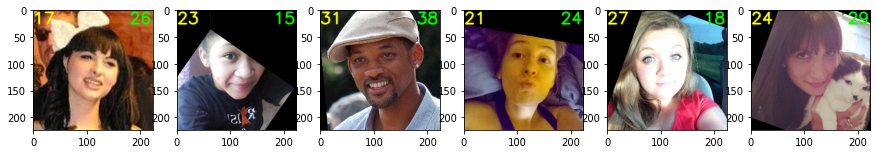

In [ ]:
# my run
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [ ]:
# my run
prediction = test(w, b, features_test, 'gd.txt')
# print("Test results has saved to gd.txt")
# print(prediction[:10])

Test results has saved to gd.txt
[[25.89356212]
 [73.57236948]
 [49.91327351]
 [21.75043095]
 [34.43700976]
 [32.08779274]
 [33.82742186]
 [42.25437555]
 [21.56142178]
 [54.02813217]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)
    
    # Set the random seed
    np.random.seed(0)

    # Init weights and bias
    weights = np.random.randn(feature.shape[1], 1)
    bias = np.random.rand(1, 1)

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size
    if len(age) % batch_size != 0:
        t += 1
    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))  
        
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
            # print(f'batch_feature.shape: {batch_feature.shape}\n batch_age.shape: {batch_age.shape}')
            batch_age = batch_age.reshape((-1, 1))
            ##########################################################################
            # TODO: YOUR CODE HERE
            ########################################################################## 
            # forward pass
            y_pred = batch_feature @ weights + bias

            # calculate loss
            loss = np.sum((batch_age - y_pred)**2)/batch_feature.shape[0]

            # calculate gradient 
            dw = -(2/batch_feature.shape[0]) * np.dot(batch_feature.T, batch_age - y_pred)
            db = -(2/batch_feature.shape[0]) * np.sum(batch_age - y_pred)

            # update weights
            weights -= lr * dw
            bias -= lr * db
   
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
        
        # print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

=> epoch: 1   Loss: 30.96
=> epoch: 2   Loss: 15.3486
=> epoch: 3   Loss: 80.3438
=> epoch: 4   Loss: 15.3799
=> epoch: 5   Loss: 50.5246
=> epoch: 6   Loss: 43.0569
=> epoch: 7   Loss: 32.5897
=> epoch: 8   Loss: 102.4117
=> epoch: 9   Loss: 194.7119
=> epoch: 10   Loss: 104.7047
=> epoch: 11   Loss: 24.9558
=> epoch: 12   Loss: 13.6898
=> epoch: 13   Loss: 27.9602
=> epoch: 14   Loss: 15.3583
=> epoch: 15   Loss: 27.6781
=> epoch: 16   Loss: 32.6999
=> epoch: 17   Loss: 49.5186
=> epoch: 18   Loss: 23.2799
=> epoch: 19   Loss: 60.6649
=> epoch: 20   Loss: 20.8409
=> epoch: 21   Loss: 27.4429
=> epoch: 22   Loss: 85.2446
=> epoch: 23   Loss: 23.7734
=> epoch: 24   Loss: 18.6185
=> epoch: 25   Loss: 30.7694
=> epoch: 26   Loss: 14.4831
=> epoch: 27   Loss: 17.1796
=> epoch: 28   Loss: 9.9506
=> epoch: 29   Loss: 21.9614
=> epoch: 30   Loss: 16.2102
=> epoch: 31   Loss: 35.7313
=> epoch: 32   Loss: 48.3733
=> epoch: 33   Loss: 17.2531
=> epoch: 34   Loss: 11.3361
=> epoch: 35   Loss: 40

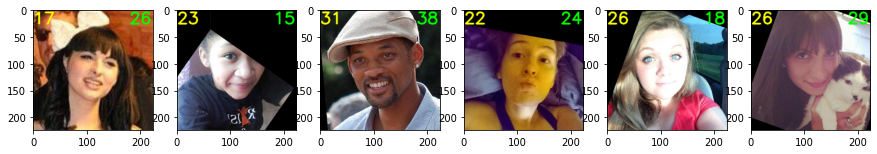

In [ ]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
# print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'sgd.txt')
# print("Test results has saved to sgd.txt")
# print(prediction[:10])

Test results has saved to sgd.txt
[[27.10786435]
 [73.34307118]
 [47.79439642]
 [22.21422981]
 [34.70380207]
 [32.95120108]
 [35.17525232]
 [42.09569683]
 [22.18766183]
 [55.20762939]]
